In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# On recupere le fichier nettoye et les categories

data_df = pd.read_csv('Ressources/03_Donnees Nettoyees.csv')

jus_de_fruits_df = pd.read_csv('Ressources/Categories du Panier/jus_de_fruits_df.csv')
tartines_df = pd.read_csv('Ressources/Categories du Panier/tartines_df.csv')
cereales_df = pd.read_csv('Ressources/Categories du Panier/cereales_df.csv')
laits_df = pd.read_csv('Ressources/Categories du Panier/laits_df.csv')
confitures_et_pates_a_tartiner_df = pd.read_csv('Ressources/Categories du Panier/confitures_et_pates_a_tartiner_df.csv')
cafes_df = pd.read_csv('Ressources/Categories du Panier/cafes_df.csv')
thes_df = pd.read_csv('Ressources/Categories du Panier/thes_df.csv')
biscuits_sucres_df = pd.read_csv('Ressources/Categories du Panier/biscuits_sucres_df.csv')
desserts_df = pd.read_csv('Ressources/Categories du Panier/desserts_df.csv')
soupes_df = pd.read_csv('Ressources/Categories du Panier/soupes_df.csv')
pates_df = pd.read_csv('Ressources/Categories du Panier/pates_df.csv')
riz_df = pd.read_csv('Ressources/Categories du Panier/riz_df.csv')
fruits_df = pd.read_csv('Ressources/Categories du Panier/fruits_df.csv')
legumes_df = pd.read_csv('Ressources/Categories du Panier/legumes_df.csv')
sources_de_proteines_df = pd.read_csv('Ressources/Categories du Panier/sources_de_proteines_df.csv')
sauces_df = pd.read_csv('Ressources/Categories du Panier/sauces_df.csv')
biscuits_aperitifs_df = pd.read_csv('Ressources/Categories du Panier/biscuits_aperitifs_df.csv')
matieres_grasses_df = pd.read_csv('Ressources/Categories du Panier/matieres_grasses_df.csv')

data_df.head()

,Code Barre,Nom du Produit,Pays de Manufacture,Region de Manufacture,Latitude GPS,Longitude GPS,Nutriscore,Lettre Nutriscore,Ecoscore,Lettre Ecoscore,Marque,Marque de Distribution
0,0000000274722,Paupiette de volaille,France,NaN,NaN,NaN,0.0,B,51.185080,C,Comme J’aime,Non
1,0000007730009,Sable patissier,France,Normandie,49.433969,1.077589,NaN,NaN,57.495589,C,St Michel,Non
2,0000009336247,"Bonbons, tout type",Etats Unis,NaN,37.090240,-95.712891,14.0,D,38.224110,D,"Wonka,Nerds",Non
3,0000010090206,"The infuse, non sucre",France,NaN,NaN,NaN,NaN,NaN,83.954970,A,Alice Délice,Non
4,0000020004552,Vin blanc 11,France,NaN,NaN,NaN,NaN,NaN,102.297042,A,Union des Vignerons des Cotes du Rhône,Non


In [3]:
# On cree une liste avec tous nos jeux de donnees et une liste avec le nom des categories

categ_df_list = [jus_de_fruits_df, tartines_df, cereales_df, laits_df, confitures_et_pates_a_tartiner_df, cafes_df, thes_df, biscuits_sucres_df,
                 desserts_df, soupes_df, pates_df, riz_df, fruits_df, legumes_df, sources_de_proteines_df, sauces_df, biscuits_aperitifs_df, matieres_grasses_df]

catList = ['Jus de Fruits', 'Tartines', 'Cereales', 'Laits', 'Confitures et Pates a Tartiner', 
           'Cafes', 'Thes', 'Biscuits Sucres', 'Desserts', 'Soupes', 'Pates', 'Riz',
           'Fruits', 'Legumes', 'Sources de Proteines', 'Sauces', 'Biscuits Aperitifs', 'Matieres Grasses']

for i in range(len(categ_df_list)):
    categ_df_list[i].name = (catList[i].lower().replace(' ','_') + '_df')

In [4]:
# Petite correction d'erreurs etranges

errorIndex = []

for cat in categ_df_list:
    for i in range(len(cat)):
        if cat.loc[i,'Nom du Produit'] in ['Nom du Produit']:
            errorIndex.append(i)

    cat.drop(errorIndex, inplace = True)
    cat.reset_index(drop=True, inplace=True)
    
for cat in categ_df_list:
    for i in range(len(cat)):
        cat.loc[i,'Code Barre'] = float(cat.loc[i,'Code Barre'])
        cat.loc[i,'Latitude GPS'] = float(cat.loc[i,'Latitude GPS'])
        cat.loc[i,'Longitude GPS'] = float(cat.loc[i,'Longitude GPS'])
        cat.loc[i,'Nutriscore'] = float(cat.loc[i,'Nutriscore'])
        cat.loc[i,'Ecoscore'] = float(cat.loc[i,'Ecoscore'])

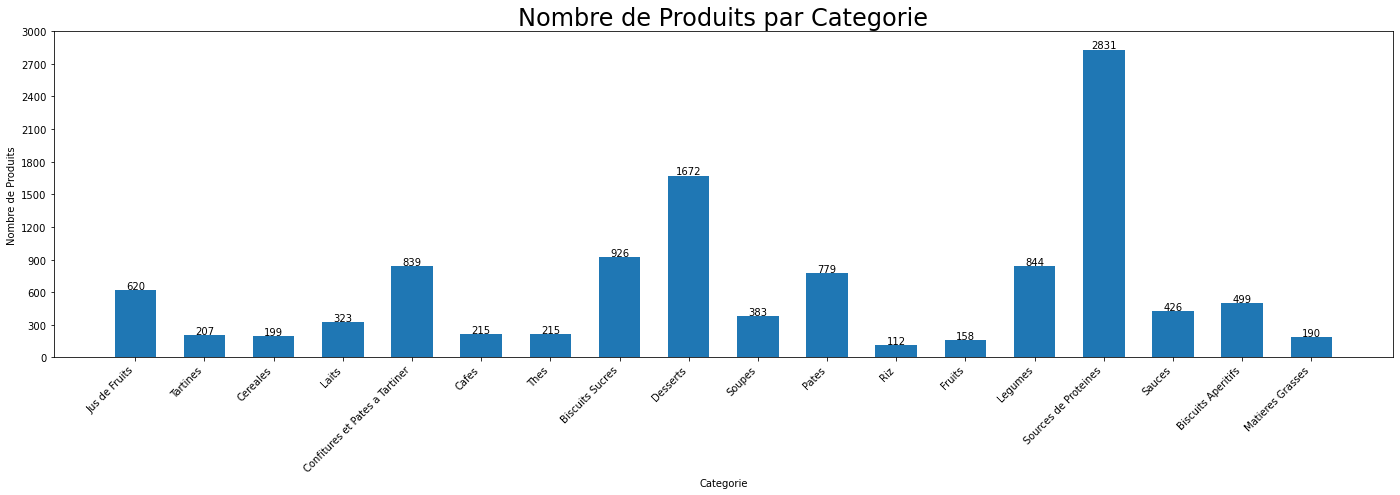

In [5]:
# On regarde si on a assez de produits dans chaque categories

nbrProduitsList = []
for cat in categ_df_list:
    nbrProduitsList.append(len(cat))

fig, ax = plt.subplots(figsize = (24,6))

idx = np.asarray([i for i in range(len(catList))])

width = 0.6

ax.bar(idx, [val for val in nbrProduitsList], width)

ax.set_xticks(idx)
ax.set_xticklabels(catList, rotation=45, horizontalalignment= 'right')
ax.set_xlabel('Categorie')
ax.set_ylabel('Nombre de Produits')
plt.yticks(np.arange(0, 3001, 300))

for i, v in enumerate(nbrProduitsList):
    plt.text(idx[i], float(v) + 10, str(v),ha='center')
    
plt.title("Nombre de Produits par Categorie", fontsize = 24)

plt.savefig('Ressources' + '/' + 'Images' + '/' + 'Produits par Categorie.png',bbox_inches='tight',pad_inches = 1, dpi= 120)
plt.show()

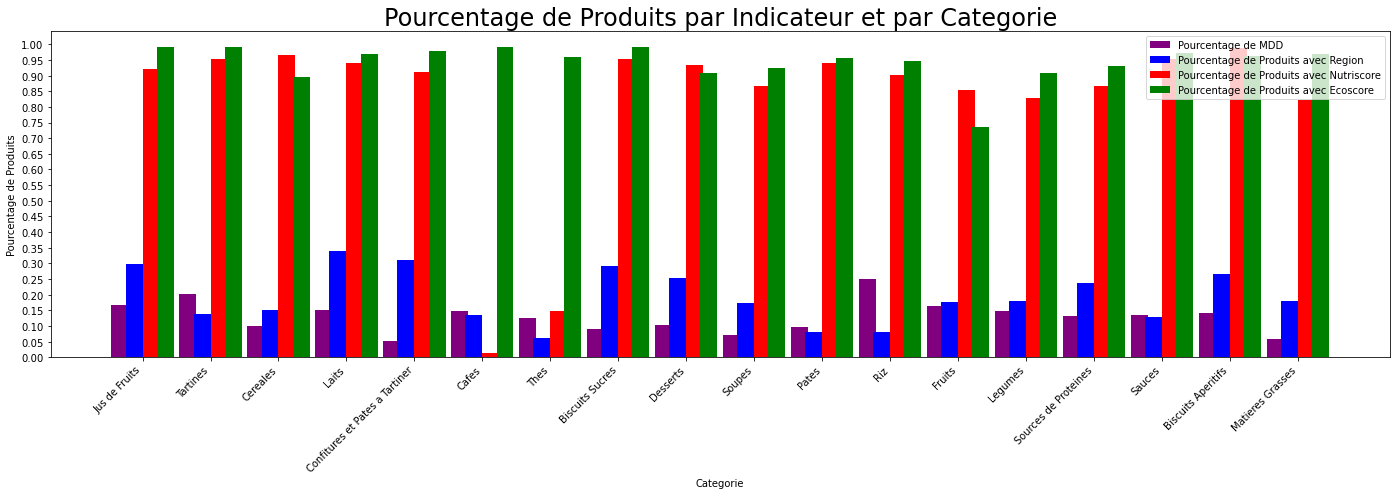

In [6]:
# On regarde si on a assez de donnees pour chaque indicateur

## Pour les MDD
mddList = []

for i in categ_df_list:
    mddList.append((pd.value_counts(i['Marque de Distribution'])['Oui'])/len(i))

## Pour les Regions
regionCountList = []

for i in categ_df_list:
    regionCountList.append((len(i) - i['Region de Manufacture'].isna().sum())/len(i))

## Pour le Nutriscore
nutriList = []

for i in categ_df_list:
    nutriList.append((len(i) - i['Nutriscore'].isna().sum())/len(i))
    
## Pour le Ecoscore
ecoList = []

for i in categ_df_list:
    ecoList.append((len(i) - i['Ecoscore'].isna().sum())/len(i))

# On fait le graphe sous matplotlib

fig, ax = plt.subplots(figsize = (24,6))

idx = np.asarray([i for i in range(len(catList))])

width = 1

ax.bar(idx-width/3, [val for val in mddList], width=width/4, color= 'purple')
ax.bar(idx-width/8, [val for val in regionCountList], width=width/4, color= 'blue')
ax.bar(idx+width/8, [val for val in nutriList], width=width/4, color= 'red')
ax.bar(idx+width/3, [val for val in ecoList], width=width/4, color= 'green')

ax.set_xticks(idx)
ax.set_xticklabels(catList, rotation=45, horizontalalignment= 'right')
ax.legend(['Pourcentage de MDD', 'Pourcentage de Produits avec Region', 'Pourcentage de Produits avec Nutriscore', 'Pourcentage de Produits avec Ecoscore'])
ax.set_xlabel('Categorie')
ax.set_ylabel('Pourcentage de Produits')
plt.yticks(np.arange(0, 1.05, 0.05))

plt.title("Pourcentage de Produits par Indicateur et par Categorie", fontsize = 24)

plt.savefig('Ressources' + '/' + 'Images' + '/' + 'Pourcentage par Indicateur.png',bbox_inches='tight',pad_inches = 1, dpi= 120)
plt.show()

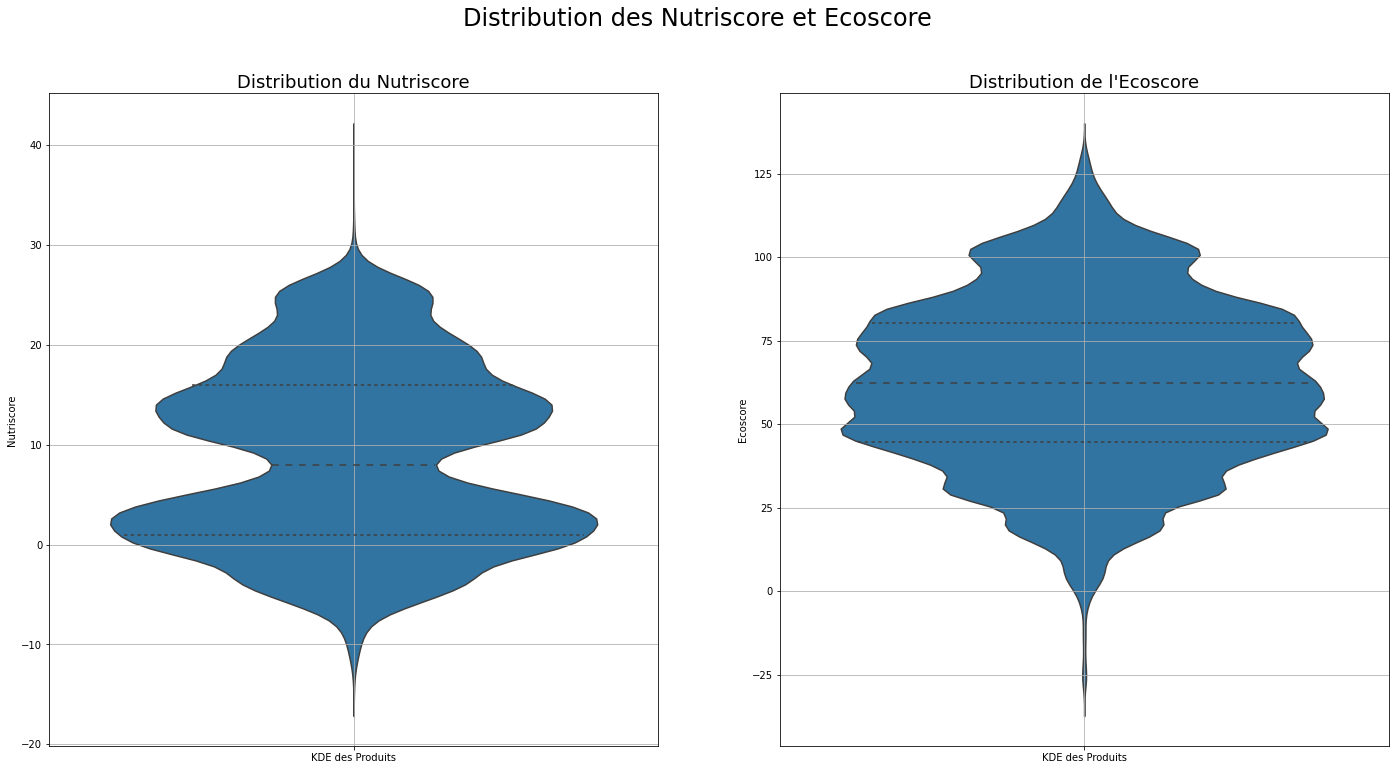

In [7]:
# On regarde la disribution du Nutriscore et de l'Ecoscore

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24,12))
x = np.arange(2)

plot1 = sns.violinplot(y = 'Nutriscore', data = data_df, split = True, ax = ax1, inner = 'quartile')
plot1.set_xticklabels(['KDE des Produits'])
ax1.grid()
ax1.set_title('Distribution du Nutriscore', fontsize = 18)

plot2 = sns.violinplot(y = 'Ecoscore', data = data_df, split = True, ax = ax2, inner = 'quartile')
plot2.set_xticklabels(['KDE des Produits'])
ax2.grid()
ax2.set_title("Distribution de l'Ecoscore", fontsize = 18)

plt.suptitle('Distribution des Nutriscore et Ecoscore', fontsize = 24)

plt.savefig('Ressources' + '/' + 'Images' + '/' + 'Distribution EcoNutriscore.png',bbox_inches='tight',pad_inches = 1, dpi= 120)

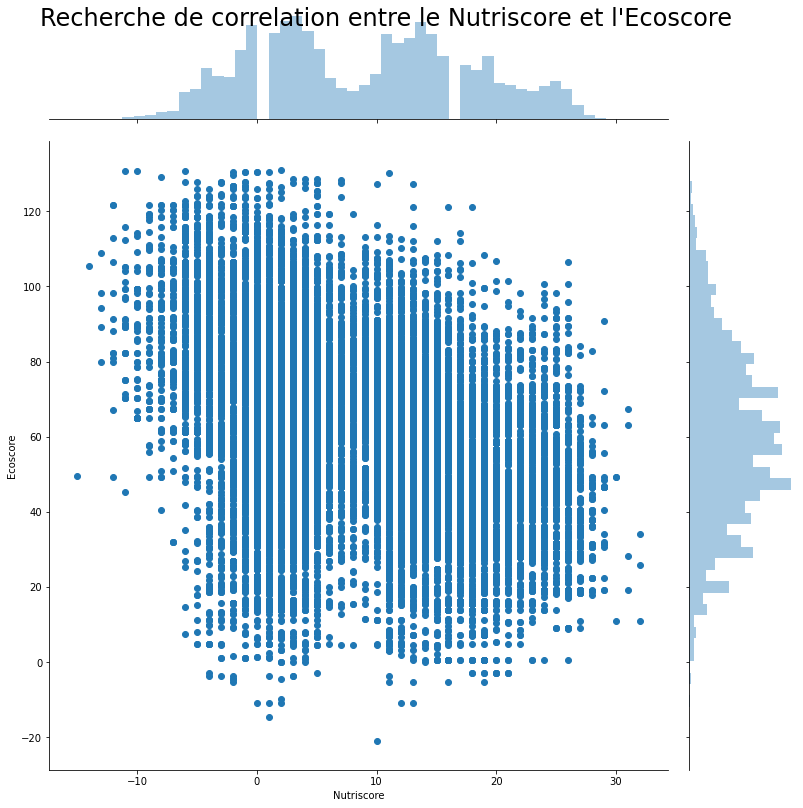

In [8]:
# On observe si il y a une correlation entre les deux

plot = sns.jointplot(x = 'Nutriscore', y = 'Ecoscore', data = data_df)
plot.fig.set_size_inches((12,12))
plot.fig.suptitle("Recherche de correlation entre le Nutriscore et l'Ecoscore", fontsize = 24)

plt.savefig('Ressources' + '/' + 'Images' + '/' + 'Correlation EcoNutriscore.png',bbox_inches='tight',pad_inches = 1, dpi= 120)

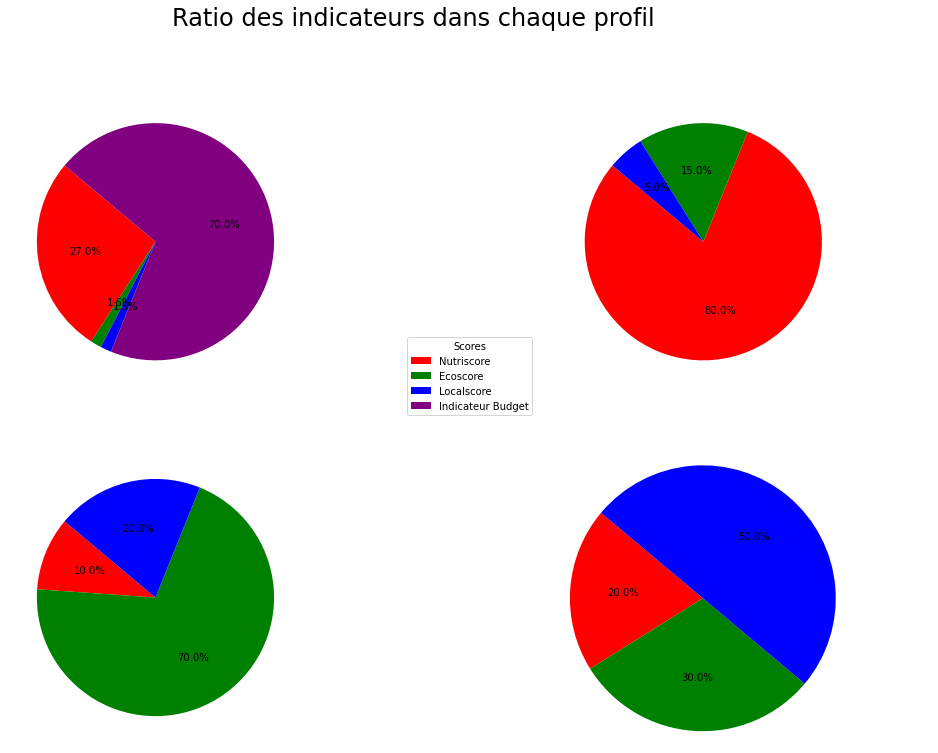

In [9]:
# Diagramme pour les ratio des profils
# Data to plot


labels = ['Nutriscore', 'Ecoscore', 'Localscore', 'Indicateur Budget']

prixRatio = [0.27, 0.015, 0.015, 0.70]
moiRatio = [ 0.8, 0.15,  0.05]
planeteRatio = [0.1, 0.7, 0.2]
regionRatio = [0.2,  0.3, 0.5]

colors = ['red', 'green', 'blue', 'purple']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (18,12))
fig.suptitle('Ratio des indicateurs dans chaque profil', fontsize = 24)

# Petit Prix
ax1.pie(prixRatio, colors=colors,
autopct='%1.1f%%', startangle=140)


# Bon pour moi
ax2.pie(moiRatio, colors=colors,
autopct='%1.1f%%', startangle=140)


# Bon pour la planete
ax3.pie(planeteRatio, colors=colors,
autopct='%1.1f%%', startangle=140)


# Bon pour la region
ax4.pie(regionRatio, colors=colors,
autopct='%1.1f%%', startangle=140)


fig.legend(labels=labels,       # The labels for each line
           loc="center",        # Position of legend
           title="Scores"       # Title for the legend
           )

plt.axis('equal')
plt.savefig('Ressources' + '/' + 'Images' + '/' + 'Ratio Scores.png',bbox_inches='tight',pad_inches = 1, dpi= 120)
plt.show()